# Data Exploration of the MS COCO Dataset

> COCO is a large-scale object detection, segmentation, and captioning dataset. COCO has several features:

> - Object segmentation
> - Recognition in context
> - Superpixel stuff segmentation
> - 330K images (>200K labeled)
> - 1.5 million object instances
> - 80 object categories
> - 91 stuff categories
> - 5 captions per image
> - 250,000 people with keypoints

The COCO Dataset is available [here](http://cocodataset.org/).

In [1]:
import json
import pandas as pd
from os import path

caption_data_path = path.join('..', 'data', 'annotations', 'captions_train2014.json')
caption_data = json.load(open(caption_data_path))
images = pd.DataFrame(caption_data['images'])
images = images.set_index('id')

print ('%s rows.' % len(images))
images.head()

82783 rows.


,coco_url,date_captured,file_name,flickr_url,height,license,width
id,,,,,,,
57870,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 16:28:13,COCO_train2014_000000057870.jpg,http://farm4.staticflickr.com/3153/2970773875_...,480,5,640
384029,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 16:29:45,COCO_train2014_000000384029.jpg,http://farm3.staticflickr.com/2422/3577229611_...,429,5,640
222016,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 16:37:59,COCO_train2014_000000222016.jpg,http://farm2.staticflickr.com/1431/1118526611_...,640,1,480
520950,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 16:44:40,COCO_train2014_000000520950.jpg,http://farm8.staticflickr.com/7007/6413705793_...,427,3,640
69675,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 16:46:33,COCO_train2014_000000069675.jpg,http://farm8.staticflickr.com/7156/6415223357_...,480,4,640


In [2]:
annotations = pd.DataFrame(caption_data['annotations'])
annotations = annotations.set_index('id')

print ('%s rows.' % len(annotations))
annotations.head()

414113 rows.


,caption,image_id
id,,
48,A very clean and well decorated empty bathroom,318556
67,A panoramic view of a kitchen and all of its a...,116100
126,A blue and white bathroom with butterfly theme...,318556
148,A panoramic photo of a kitchen and dining room,116100
173,A graffiti-ed stop sign across the street from...,379340


In [3]:
joined = annotations.join(images, on='image_id')

print ('%s rows.' % len(joined))
joined.head()

414113 rows.


,caption,image_id,coco_url,date_captured,file_name,flickr_url,height,license,width
id,,,,,,,,,
48,A very clean and well decorated empty bathroom,318556,http://images.cocodataset.org/train2014/COCO_t...,2013-11-15 05:00:35,COCO_train2014_000000318556.jpg,http://farm4.staticflickr.com/3133/3378902101_...,640,1,480
67,A panoramic view of a kitchen and all of its a...,116100,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 19:43:48,COCO_train2014_000000116100.jpg,http://farm9.staticflickr.com/8084/8329525274_...,182,2,640
126,A blue and white bathroom with butterfly theme...,318556,http://images.cocodataset.org/train2014/COCO_t...,2013-11-15 05:00:35,COCO_train2014_000000318556.jpg,http://farm4.staticflickr.com/3133/3378902101_...,640,1,480
148,A panoramic photo of a kitchen and dining room,116100,http://images.cocodataset.org/train2014/COCO_t...,2013-11-14 19:43:48,COCO_train2014_000000116100.jpg,http://farm9.staticflickr.com/8084/8329525274_...,182,2,640
173,A graffiti-ed stop sign across the street from...,379340,http://images.cocodataset.org/train2014/COCO_t...,2013-11-15 06:07:46,COCO_train2014_000000379340.jpg,http://farm1.staticflickr.com/1/163009_b84730e...,640,3,480


A banana and two pears in a bowl.
A bowl filled with bananas and other fruit.
A ceramic bowl of fresh bananas and mangoes
A bowl with a bunch of bananas and a couple of mangoes in it.
A bowl with some bananas and figs are sitting.


Image is of dimensions 640 by 480


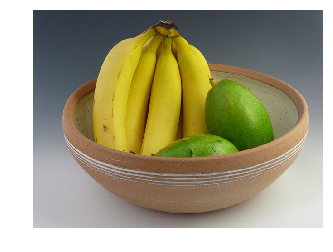

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np


def show_image_and_captions(image_id):
    records = joined[joined.image_id == image_id]
    file_name = records.file_name.iloc[0]
    image_path = path.join('..', 'data', 'train2014', file_name)
    image = Image.open(image_path)
    
    plt.axis('off')
    plt.imshow(np.array(image))
    
    for caption in records.caption:
        print (caption)
    print ('\n\nImage is of dimensions %s by %s' % image.size)

show_image_and_captions(6809)

the kitchen is full of spices on the rack
A kitchen with counter, oven and other accessories.
A small kitchen that utilizes all of its space. 
This small kitchen has pots, pans and spices on display
A VERY SMALL KITCHEN WITH A STOVE AND A SHELF OF POTS 


Image is of dimensions 640 by 427


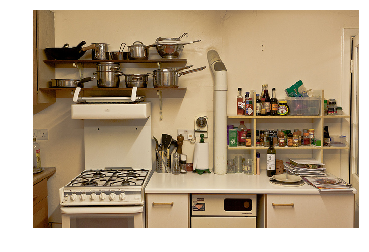

In [5]:
show_image_and_captions(520950)

A graffiti-ed stop sign across the street from a red car 
A vandalized stop sign and a red beetle on the road
A red stop sign with a Bush bumper sticker under the word stop.
A stop sign that has been vandalized is pictured in front of a parked car.
A street sign modified to read stop bush.


Image is of dimensions 480 by 640


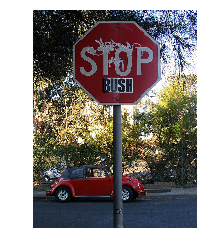

In [6]:
show_image_and_captions(379340)

A restaurant has modern wooden tables and chairs.
A long restaurant table with rattan rounded back chairs.
a long table with a plant on top of it surrounded with wooden chairs 
A long table with a flower arrangement in the middle for meetings
A table is adorned with wooden chairs with blue accents.


Image is of dimensions 640 by 480


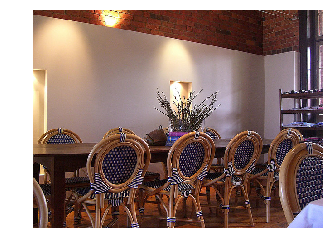

In [7]:
show_image_and_captions(57870)